In [1]:
%pip install pandas matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 13.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [matplotlib]4 [matplotlib]n]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

In [6]:
train_filename = os.path.join(os.getcwd(), 'ds03/assets/Train_knight.csv')
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(3)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,Sith


In [ ]:
df = train_df.copy()

# Encode 'knight' as binary for later use
df['knight_encoded'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# Select only feature columns (exclude 'knight' and encoded version)
feature_cols = [col for col in df.columns if col not in ['knight', 'knight_encoded']]

# Z-Score Standardization
scaler_zscore = StandardScaler()
df_standardized = pd.DataFrame(scaler_zscore.fit_transform(df[feature_cols]), columns=feature_cols)

# Add non-integer column back
df_standardized['knight'] = df['knight'] # Add encoded back
df_standardized['knight_encoded'] = df['knight_encoded'] # Add encoded back
df_standardized

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,-0.672190,-0.447007,-0.701691,-0.647079,-0.408080,-0.812359,-0.770179,-0.867035,0.173459,-0.366543,...,-0.600256,-0.172521,-0.651490,-0.581014,-0.367009,-0.525921,-0.612764,-0.952936,-0.180659,-0.150547
1,1.671168,0.731340,1.624479,1.798709,0.139449,-0.019929,0.742230,1.222095,-0.826745,-1.308423,...,2.384122,0.896162,2.461756,2.839651,0.805324,0.363692,1.210294,1.882921,-0.199724,-0.424881
2,-0.915010,-0.461465,-0.851698,-0.825470,-0.534659,0.148840,0.066543,-0.342094,-1.177761,0.570808,...,-0.834789,0.225517,-0.523624,-0.740496,0.276024,0.945938,0.934721,0.607673,-0.594888,0.614445
3,-0.724850,-0.225314,-0.654097,-0.715305,1.551689,0.874940,0.160680,0.176467,0.588639,1.499103,...,-0.619621,-0.020330,-0.585395,-0.644173,1.977658,0.193766,0.194437,0.394877,-0.386907,0.472398
4,-0.830169,0.172288,-0.869971,-0.776442,-0.831973,-1.169325,-1.067454,-1.151858,-0.619156,0.122510,...,-0.927311,0.151931,-0.948607,-0.815952,-0.961925,-1.121724,-1.168418,-1.339338,-0.565424,-0.425966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.603097,-1.765116,-1.590684,-1.259634,0.081310,-1.000752,-0.870525,-1.095111,-0.445535,1.396463,...,-1.448663,-1.692759,-1.457598,-1.115912,1.772062,-0.830163,-0.743348,-1.096382,0.583670,0.340110
394,-0.166071,-1.969941,-0.164131,-0.271100,2.405362,0.019320,-0.260341,0.440133,2.272002,0.572318,...,-0.464700,-2.179436,-0.485944,-0.499969,0.538487,-0.742701,-0.889313,-0.638946,-0.300248,-0.654758
395,-0.718998,-0.189168,-0.705516,-0.704377,1.308834,-0.039553,-0.235889,-0.376116,-0.000161,0.389678,...,-0.666958,0.625228,-0.666624,-0.656097,1.575215,0.057575,0.048983,0.091757,-0.133864,0.378604
396,-1.235064,0.068671,-1.182308,-1.041666,0.300616,-0.132376,-0.351945,-0.497317,0.543346,0.090812,...,-1.179058,0.218828,-1.077090,-0.955126,1.010920,-0.166078,-0.057436,-0.280407,-0.452768,0.049511


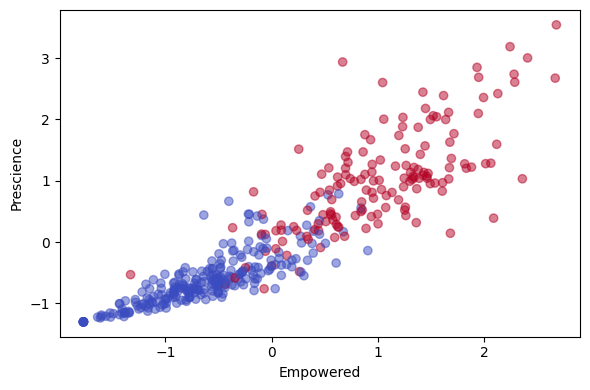

In [ ]:
separating_pair = ('Empowered', 'Prescience')
plt.figure(figsize=(6, 4))
plt.scatter(df_standardized[separating_pair[0]], df_standardized[separating_pair[1]],  c=df_standardized['knight_encoded'], cmap='coolwarm', alpha=0.5, label='Train')
plt.xlabel(separating_pair[0])
plt.ylabel(separating_pair[1])

plt.tight_layout()
plt.show()